In [8]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import VotingRegressor

In [9]:
# Loading the dataset

file = "./aadr.us.txt"

ds = pd.read_csv(file)

In [10]:
print("\nSample Data")
print("===========\n")
print(ds.head())
print(ds.shape)


Sample Data

         Date    Open    High     Low   Close  Volume  OpenInt
0  2010-07-21  24.333  24.333  23.946  23.946   43321        0
1  2010-07-22  24.644  24.644  24.362  24.487   18031        0
2  2010-07-23  24.759  24.759  24.314  24.507    8897        0
3  2010-07-26  24.624  24.624  24.449  24.595   19443        0
4  2010-07-27  24.477  24.517  24.431  24.517    8456        0
(1565, 7)


In [11]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(ds.columns)

print("\n\nNumber of Instances in Sample Data:")
print("========================================\n")
print(ds.iloc[: ,].count())



Attributes in Sample Data:

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


Number of Instances in Sample Data:

Date       1565
Open       1565
High       1565
Low        1565
Close      1565
Volume     1565
OpenInt    1565
dtype: int64


In [12]:
# Dropping insignificant feature

ds.drop(["Date", "OpenInt"], axis = 1, inplace = True)
print(ds.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [13]:
# Dividing the dataset into input and otput

X = ds.drop("Close", axis = 1)
y = ds["Close"]

print(X.columns)

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


In [14]:
# Checking the datatypes of input and fetures

print(X.dtypes)
print(y.dtypes)

Open      float64
High      float64
Low       float64
Volume      int64
dtype: object
float64


In [15]:
# Checking the correlation between various parameters

print(ds[["Open", "Close"]].corr(),"\n")
print(ds[["High", "Close"]].corr(),"\n")
print(ds[["Low", "Close"]].corr(),"\n")
print(ds[["Volume", "Close"]].corr())

           Open     Close
Open   1.000000  0.999066
Close  0.999066  1.000000 

           High     Close
High   1.000000  0.999256
Close  0.999256  1.000000 

            Low     Close
Low    1.000000  0.999596
Close  0.999596  1.000000 

          Volume     Close
Volume  1.000000  0.443389
Close   0.443389  1.000000


In [16]:
# Splitting of input and output data into Train and Test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0 , shuffle = False)

In [17]:
# Training our dataset using LinearRegression as model

model_LR = LinearRegression().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LR.score(x_test, y_test))

pickle.dump(model_LR, open('./models/model_LR.pkl', 'wb'))




Score on training data:
0.99903


Score on testing data:
0.99898


In [18]:

y_pred_LR = model_LR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LR)):
    expl=((actual_data[i]-y_pred_LR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LR[i], expl))

(%0.27)
Actual Value $38.55, Predicted value $38.78 (%-0.59)
Actual Value $38.54, Predicted value $38.47 (%0.17)
Actual Value $38.07, Predicted value $38.23 (%-0.42)
Actual Value $38.11, Predicted value $38.09 (%0.07)
Actual Value $38.51, Predicted value $38.50 (%0.02)
Actual Value $38.06, Predicted value $38.26 (%-0.53)
Actual Value $37.84, Predicted value $37.90 (%-0.16)
Actual Value $38.37, Predicted value $38.33 (%0.11)
Actual Value $37.77, Predicted value $37.79 (%-0.07)
Actual Value $37.38, Predicted value $37.32 (%0.15)
Actual Value $37.66, Predicted value $37.65 (%0.02)
Actual Value $37.53, Predicted value $37.42 (%0.29)
Actual Value $37.77, Predicted value $37.66 (%0.28)
Actual Value $37.76, Predicted value $37.68 (%0.23)
Actual Value $37.60, Predicted value $37.53 (%0.20)
Actual Value $37.48, Predicted value $37.46 (%0.06)
Actual Value $37.64, Predicted value $37.73 (%-0.24)
Actual Value $37.83, Predicted value $37.82 (%0.02)
Actual Value $37.55, Predicted value $37.58 (%-0.0

In [19]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LR), 2)) 
print
("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LR), 2))


Evaluation according to different parameters:

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.09
R2 score = 1.0


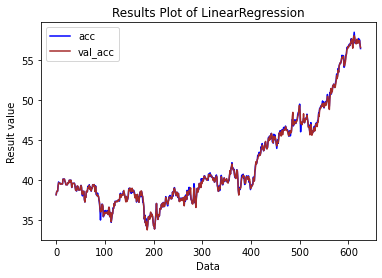

In [20]:
# Plotting the results

r = range(len(y_pred_LR))

plt.title("Results Plot of LinearRegression")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [21]:
# Training our dataset using GradientBoostingRegressor as model

model_GBR = Pipeline([('scaler', StandardScaler()), ('model_GBR', GradientBoostingRegressor(random_state=0))])

model_GBR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_GBR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_GBR.score(x_test, y_test))

pickle.dump(model_GBR, open('./models/model_GBR.pkl', 'wb'))



Score on training data:
0.99961


Score on testing data:
-0.30796


In [22]:
y_pred_GBR = model_GBR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_GBR)):
    expl=((actual_data[i]-y_pred_GBR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_GBR[i], expl))

8 (%0.14)
Actual Value $38.07, Predicted value $38.19 (%-0.31)
Actual Value $38.11, Predicted value $38.10 (%0.04)
Actual Value $38.51, Predicted value $38.42 (%0.23)
Actual Value $38.06, Predicted value $38.19 (%-0.34)
Actual Value $37.84, Predicted value $37.90 (%-0.18)
Actual Value $38.37, Predicted value $38.26 (%0.28)
Actual Value $37.77, Predicted value $37.83 (%-0.17)
Actual Value $37.38, Predicted value $37.36 (%0.06)
Actual Value $37.66, Predicted value $37.73 (%-0.19)
Actual Value $37.53, Predicted value $37.45 (%0.20)
Actual Value $37.77, Predicted value $37.72 (%0.12)
Actual Value $37.76, Predicted value $37.76 (%0.01)
Actual Value $37.60, Predicted value $37.54 (%0.17)
Actual Value $37.48, Predicted value $37.47 (%0.02)
Actual Value $37.64, Predicted value $37.64 (%0.00)
Actual Value $37.83, Predicted value $37.80 (%0.08)
Actual Value $37.55, Predicted value $37.53 (%0.07)
Actual Value $36.87, Predicted value $36.75 (%0.33)
Actual Value $37.98, Predicted value $38.04 (%-0.

In [23]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_GBR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_GBR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_GBR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_GBR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_GBR), 2))


Evaluation according to different parameters:

Mean absolute error = 3.96
Mean squared error = 44.07
Median absolute error = 1.09
Explain variance score = 0.15
R2 score = -0.31


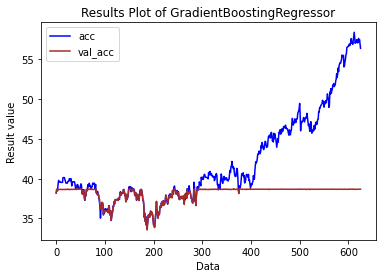

In [24]:
# Plotting the results

r = range(len(y_pred_GBR))

plt.title("Results Plot of GradientBoostingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_GBR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [25]:
# Training our dataset using RandomForestRegressor as model

model_RFR = Pipeline([('scaler', StandardScaler()), ('model_RFR', RandomForestRegressor(random_state=0))])
model_RFR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_RFR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_RFR.score(x_test, y_test))

pickle.dump(model_RFR, open('./models/model_RFR.pkl', 'wb'))



Score on training data:
0.99981


Score on testing data:
-0.30931


In [26]:
y_pred_RFR = model_RFR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_RFR)):
    expl=((actual_data[i]-y_pred_RFR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_RFR[i], expl))

%0.23)
Actual Value $38.07, Predicted value $38.21 (%-0.38)
Actual Value $38.11, Predicted value $38.12 (%-0.01)
Actual Value $38.51, Predicted value $38.48 (%0.08)
Actual Value $38.06, Predicted value $38.16 (%-0.26)
Actual Value $37.84, Predicted value $37.93 (%-0.25)
Actual Value $38.37, Predicted value $38.31 (%0.15)
Actual Value $37.77, Predicted value $37.80 (%-0.08)
Actual Value $37.38, Predicted value $37.38 (%0.00)
Actual Value $37.66, Predicted value $37.69 (%-0.08)
Actual Value $37.53, Predicted value $37.43 (%0.27)
Actual Value $37.77, Predicted value $37.74 (%0.08)
Actual Value $37.76, Predicted value $37.74 (%0.07)
Actual Value $37.60, Predicted value $37.54 (%0.17)
Actual Value $37.48, Predicted value $37.47 (%0.02)
Actual Value $37.64, Predicted value $37.62 (%0.07)
Actual Value $37.83, Predicted value $37.81 (%0.05)
Actual Value $37.55, Predicted value $37.58 (%-0.07)
Actual Value $36.87, Predicted value $36.66 (%0.58)
Actual Value $37.98, Predicted value $38.00 (%-0.0

In [27]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_RFR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_RFR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_RFR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_RFR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_RFR), 2))


Evaluation according to different parameters:

Mean absolute error = 3.95
Mean squared error = 44.12
Median absolute error = 1.09
Explain variance score = 0.15
R2 score = -0.31


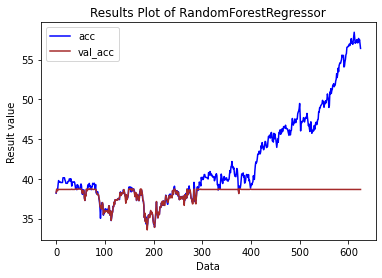

In [28]:
# Plotting the results

r = range(len(y_pred_RFR))

plt.title("Results Plot of RandomForestRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_RFR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [29]:
# Training our dataset using SupportVectorRegressor as model

model_SVR = Pipeline([('scaler', StandardScaler()), ('model_SVR', SVR())])
model_SVR.fit(x_train, y_train)
# model_SVR = SVR().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_SVR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_SVR.score(x_test, y_test))

pickle.dump(model_SVR, open('./models/model_SVR.pkl', 'wb'))




Score on training data:
0.99574


Score on testing data:
-2.26821


In [30]:
y_pred_SVR = model_SVR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_SVR)):
    expl=((actual_data[i]-y_pred_SVR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_SVR[i], expl))

ctual Value $38.07, Predicted value $38.17 (%-0.26)
Actual Value $38.11, Predicted value $37.96 (%0.40)
Actual Value $38.51, Predicted value $38.15 (%0.93)
Actual Value $38.06, Predicted value $38.19 (%-0.34)
Actual Value $37.84, Predicted value $37.86 (%-0.07)
Actual Value $38.37, Predicted value $38.12 (%0.64)
Actual Value $37.77, Predicted value $37.76 (%0.02)
Actual Value $37.38, Predicted value $37.44 (%-0.18)
Actual Value $37.66, Predicted value $37.60 (%0.13)
Actual Value $37.53, Predicted value $37.35 (%0.47)
Actual Value $37.77, Predicted value $37.64 (%0.33)
Actual Value $37.76, Predicted value $37.73 (%0.08)
Actual Value $37.60, Predicted value $37.55 (%0.14)
Actual Value $37.48, Predicted value $37.49 (%-0.03)
Actual Value $37.64, Predicted value $37.77 (%-0.33)
Actual Value $37.83, Predicted value $37.72 (%0.30)
Actual Value $37.55, Predicted value $37.57 (%-0.05)
Actual Value $36.87, Predicted value $36.98 (%-0.28)
Actual Value $37.98, Predicted value $37.84 (%0.37)
Actua

In [31]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_SVR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_SVR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_SVR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_SVR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_SVR), 2))


Evaluation according to different parameters:

Mean absolute error = 6.45
Mean squared error = 110.12
Median absolute error = 1.4
Explain variance score = -1.04
R2 score = -2.27


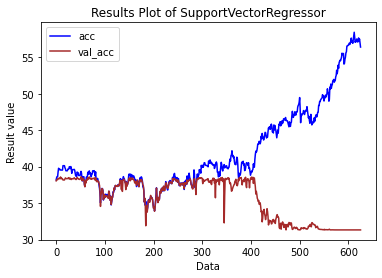

In [32]:
# Plotting the results

r = range(len(y_pred_SVR))

plt.title("Results Plot of SupportVectorRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_SVR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [33]:
# Training our dataset using KernalRidgeRegressor as model

model_KRR = KernelRidge(alpha=1.0).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_KRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_KRR.score(x_test, y_test))

pickle.dump(model_KRR, open('./models/model_KRR.pkl', 'wb'))



Score on training data:
0.99902


Score on testing data:
0.99901


In [34]:
y_pred_KRR = model_KRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_KRR)):
    expl=((actual_data[i]-y_pred_KRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_KRR[i], expl))

8.81 (%-0.68)
Actual Value $38.54, Predicted value $38.49 (%0.13)
Actual Value $38.07, Predicted value $38.26 (%-0.50)
Actual Value $38.11, Predicted value $38.10 (%0.04)
Actual Value $38.51, Predicted value $38.51 (%-0.01)
Actual Value $38.06, Predicted value $38.28 (%-0.58)
Actual Value $37.84, Predicted value $37.91 (%-0.21)
Actual Value $38.37, Predicted value $38.33 (%0.08)
Actual Value $37.77, Predicted value $37.81 (%-0.11)
Actual Value $37.38, Predicted value $37.33 (%0.12)
Actual Value $37.66, Predicted value $37.66 (%-0.01)
Actual Value $37.53, Predicted value $37.42 (%0.28)
Actual Value $37.77, Predicted value $37.67 (%0.24)
Actual Value $37.76, Predicted value $37.69 (%0.19)
Actual Value $37.60, Predicted value $37.54 (%0.17)
Actual Value $37.48, Predicted value $37.47 (%0.02)
Actual Value $37.64, Predicted value $37.74 (%-0.25)
Actual Value $37.83, Predicted value $37.84 (%-0.01)
Actual Value $37.55, Predicted value $37.59 (%-0.10)
Actual Value $36.87, Predicted value $36.

In [35]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_KRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_KRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_KRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_KRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_KRR), 2))


Evaluation according to different parameters:

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.08
Explain variance score = 1.0
R2 score = 1.0


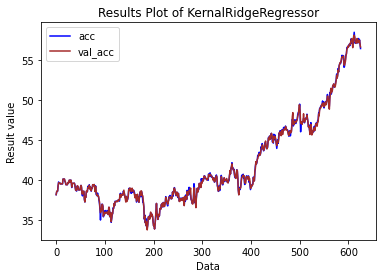

In [36]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of KernalRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_KRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [37]:
# Training our dataset using BayesianRidgeRegressor as model

model_BRR = BayesianRidge().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_BRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_BRR.score(x_test, y_test))

pickle.dump(model_BRR, open('./models/model_BRR.pkl', 'wb'))




Score on training data:
0.99903


Score on testing data:
0.99898


In [38]:
y_pred_BRR = model_BRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_BRR)):
    expl=((actual_data[i]-y_pred_BRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_BRR[i], expl))

7 (%0.27)
Actual Value $38.55, Predicted value $38.78 (%-0.60)
Actual Value $38.54, Predicted value $38.47 (%0.17)
Actual Value $38.07, Predicted value $38.23 (%-0.42)
Actual Value $38.11, Predicted value $38.09 (%0.07)
Actual Value $38.51, Predicted value $38.50 (%0.02)
Actual Value $38.06, Predicted value $38.26 (%-0.53)
Actual Value $37.84, Predicted value $37.90 (%-0.16)
Actual Value $38.37, Predicted value $38.32 (%0.11)
Actual Value $37.77, Predicted value $37.79 (%-0.07)
Actual Value $37.38, Predicted value $37.32 (%0.15)
Actual Value $37.66, Predicted value $37.65 (%0.02)
Actual Value $37.53, Predicted value $37.42 (%0.29)
Actual Value $37.77, Predicted value $37.66 (%0.28)
Actual Value $37.76, Predicted value $37.68 (%0.23)
Actual Value $37.60, Predicted value $37.53 (%0.20)
Actual Value $37.48, Predicted value $37.46 (%0.06)
Actual Value $37.64, Predicted value $37.73 (%-0.23)
Actual Value $37.83, Predicted value $37.82 (%0.02)
Actual Value $37.55, Predicted value $37.58 (%-0

In [39]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_BRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_BRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_BRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_BRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_BRR), 2))


Evaluation according to different parameters:

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.09
Explain variance score = 1.0
R2 score = 1.0


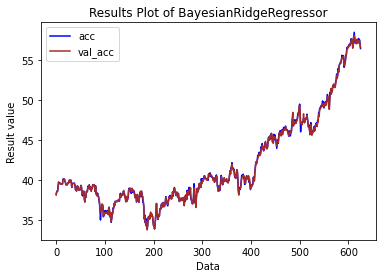

In [40]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of BayesianRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_BRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [41]:
# Training our dataset using LassoRegressor as model

model_LSS = Lasso(alpha = 0).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LSS.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LSS.score(x_test, y_test))

pickle.dump(model_LSS, open('./models/model_LSS.pkl', 'wb'))



Score on training data:
0.99892


Score on testing data:
0.99861


In [42]:
y_pred_LSS = model_LSS.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LSS)):
    expl=((actual_data[i]-y_pred_LSS[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LSS[i], expl))

tual Value $38.55, Predicted value $38.93 (%-0.99)
Actual Value $38.54, Predicted value $38.48 (%0.14)
Actual Value $38.07, Predicted value $38.36 (%-0.78)
Actual Value $38.11, Predicted value $38.07 (%0.11)
Actual Value $38.51, Predicted value $38.47 (%0.09)
Actual Value $38.06, Predicted value $38.32 (%-0.67)
Actual Value $37.84, Predicted value $37.92 (%-0.23)
Actual Value $38.37, Predicted value $38.29 (%0.19)
Actual Value $37.77, Predicted value $37.80 (%-0.08)
Actual Value $37.38, Predicted value $37.30 (%0.20)
Actual Value $37.66, Predicted value $37.62 (%0.08)
Actual Value $37.53, Predicted value $37.38 (%0.38)
Actual Value $37.77, Predicted value $37.67 (%0.26)
Actual Value $37.76, Predicted value $37.67 (%0.24)
Actual Value $37.60, Predicted value $37.51 (%0.25)
Actual Value $37.48, Predicted value $37.44 (%0.11)
Actual Value $37.64, Predicted value $37.69 (%-0.13)
Actual Value $37.83, Predicted value $37.80 (%0.09)
Actual Value $37.55, Predicted value $37.58 (%-0.05)
Actual 

In [43]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LSS), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LSS), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LSS), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LSS), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LSS), 2))


Evaluation according to different parameters:

Mean absolute error = 0.15
Mean squared error = 0.05
Median absolute error = 0.1
Explain variance score = 1.0
R2 score = 1.0


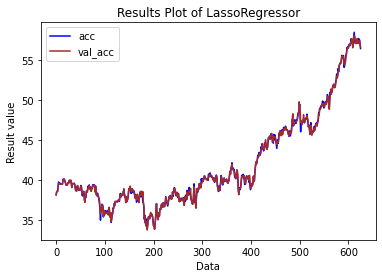

In [44]:
# Plotting the results

r = range(len(y_pred_LSS))

plt.title("Results Plot of LassoRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LSS, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [45]:
# Training our dataset using DecisionTreeRegressor as model

model_DTR = DecisionTreeRegressor(random_state = 10).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_DTR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_DTR.score(x_test, y_test))

pickle.dump(model_DTR, open('./models/model_DTR.pkl', 'wb'))




Score on training data:
1.00000


Score on testing data:
-0.32228


In [46]:
y_pred_DTR = model_DTR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_DTR)):
    expl=((actual_data[i]-y_pred_DTR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_DTR[i], expl))

 (%0.23)
Actual Value $38.07, Predicted value $38.12 (%-0.14)
Actual Value $38.11, Predicted value $38.17 (%-0.16)
Actual Value $38.51, Predicted value $38.45 (%0.14)
Actual Value $38.06, Predicted value $38.16 (%-0.28)
Actual Value $37.84, Predicted value $37.95 (%-0.30)
Actual Value $38.37, Predicted value $38.33 (%0.09)
Actual Value $37.77, Predicted value $37.70 (%0.16)
Actual Value $37.38, Predicted value $37.36 (%0.05)
Actual Value $37.66, Predicted value $37.68 (%-0.06)
Actual Value $37.53, Predicted value $37.48 (%0.14)
Actual Value $37.77, Predicted value $37.78 (%-0.04)
Actual Value $37.76, Predicted value $37.70 (%0.17)
Actual Value $37.60, Predicted value $37.56 (%0.12)
Actual Value $37.48, Predicted value $37.44 (%0.10)
Actual Value $37.64, Predicted value $37.55 (%0.26)
Actual Value $37.83, Predicted value $37.85 (%-0.06)
Actual Value $37.55, Predicted value $37.56 (%-0.01)
Actual Value $36.87, Predicted value $36.53 (%0.92)
Actual Value $37.98, Predicted value $37.95 (%0

In [47]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_DTR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_DTR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_DTR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_DTR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_DTR), 2))


Evaluation according to different parameters:

Mean absolute error = 4.0
Mean squared error = 44.55
Median absolute error = 1.16
Explain variance score = 0.14
R2 score = -0.32


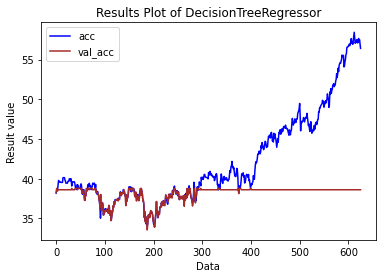

In [48]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of DecisionTreeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_DTR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [49]:
# Training our dataset using MultiLayeredPerceptronRegressor as model

model_MLP = MLPRegressor(random_state=0, max_iter=50).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_MLP.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_MLP.score(x_test, y_test))

pickle.dump(model_MLP, open('./models/model_MLP.pkl', 'wb'))



Score on training data:
0.98897


Score on testing data:
0.98216


In [50]:
y_pred_MLP = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_MLP)):
    expl=((actual_data[i]-y_pred_MLP[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_MLP[i], expl))

value $39.17 (%-0.60)
Actual Value $39.07, Predicted value $39.35 (%-0.72)
Actual Value $38.55, Predicted value $39.25 (%-1.80)
Actual Value $38.54, Predicted value $38.47 (%0.19)
Actual Value $38.07, Predicted value $37.79 (%0.73)
Actual Value $38.11, Predicted value $38.18 (%-0.19)
Actual Value $38.51, Predicted value $38.73 (%-0.57)
Actual Value $38.06, Predicted value $37.62 (%1.16)
Actual Value $37.84, Predicted value $37.99 (%-0.40)
Actual Value $38.37, Predicted value $38.27 (%0.25)
Actual Value $37.77, Predicted value $37.95 (%-0.49)
Actual Value $37.38, Predicted value $36.61 (%2.07)
Actual Value $37.66, Predicted value $38.13 (%-1.26)
Actual Value $37.53, Predicted value $37.71 (%-0.48)
Actual Value $37.77, Predicted value $37.87 (%-0.27)
Actual Value $37.76, Predicted value $37.37 (%1.04)
Actual Value $37.60, Predicted value $37.42 (%0.48)
Actual Value $37.48, Predicted value $37.45 (%0.08)
Actual Value $37.64, Predicted value $36.91 (%1.95)
Actual Value $37.83, Predicted va

In [51]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_MLP), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_MLP), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_MLP), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_MLP), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_MLP), 2))


Evaluation according to different parameters:

Mean absolute error = 0.59
Mean squared error = 0.6
Median absolute error = 0.52
Explain variance score = 0.99
R2 score = 0.98


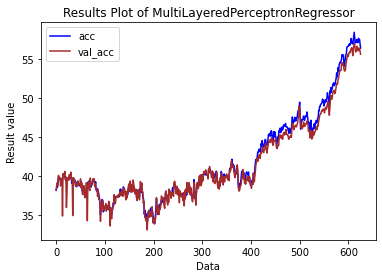

In [52]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of MultiLayeredPerceptronRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_MLP, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [53]:
# Training our dataset using VotingRegressor as model

model_VR = VotingRegressor(estimators=[('ml', model_LR), ('msv', model_SVR)])
model_VR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_VR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_VR.score(x_test, y_test))

pickle.dump(model_VR, open('./models/model_VR.pkl', 'wb'))



Score on training data:
0.99823


Score on testing data:
0.17633


In [54]:
y_pred_VR = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_VR)):
    expl=((actual_data[i]-y_pred_VR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_VR[i], expl))

value $39.17 (%-0.60)
Actual Value $39.07, Predicted value $39.35 (%-0.72)
Actual Value $38.55, Predicted value $39.25 (%-1.80)
Actual Value $38.54, Predicted value $38.47 (%0.19)
Actual Value $38.07, Predicted value $37.79 (%0.73)
Actual Value $38.11, Predicted value $38.18 (%-0.19)
Actual Value $38.51, Predicted value $38.73 (%-0.57)
Actual Value $38.06, Predicted value $37.62 (%1.16)
Actual Value $37.84, Predicted value $37.99 (%-0.40)
Actual Value $38.37, Predicted value $38.27 (%0.25)
Actual Value $37.77, Predicted value $37.95 (%-0.49)
Actual Value $37.38, Predicted value $36.61 (%2.07)
Actual Value $37.66, Predicted value $38.13 (%-1.26)
Actual Value $37.53, Predicted value $37.71 (%-0.48)
Actual Value $37.77, Predicted value $37.87 (%-0.27)
Actual Value $37.76, Predicted value $37.37 (%1.04)
Actual Value $37.60, Predicted value $37.42 (%0.48)
Actual Value $37.48, Predicted value $37.45 (%0.08)
Actual Value $37.64, Predicted value $36.91 (%1.95)
Actual Value $37.83, Predicted va

In [55]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_VR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_VR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_VR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_VR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_VR), 2))


Evaluation according to different parameters:

Mean absolute error = 0.59
Mean squared error = 0.6
Median absolute error = 0.52
Explain variance score = 0.99
R2 score = 0.98


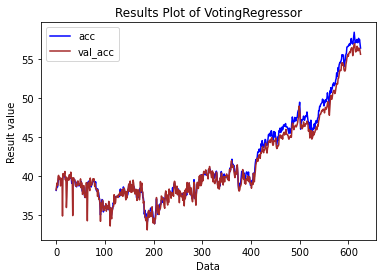

In [56]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of VotingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_VR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()